In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)

## Dataframes Observation and preparation

In [2]:
behaviour_df = pd.read_csv('d0_behaviour.csv', true_values=['True'], false_values=['False'])
behaviour_df

C:\Users\h.mercier\AppData\Local\Temp\ipykernel_29428\1615759622.py:1: DtypeWarning: Columns (9,10,11,12) have mixed types. Specify dtype option on import or set low_memory=False.
  behaviour_df = pd.read_csv('d0_behaviour.csv', true_values=['True'], false_values=['False'])


,keychain_udid,country,os,locale,timezone,device_model,gender,age,latest_version_used,has_active_subscription,has_verified_account,has_verified_profile,is_muted,session_length,had_meaningful,sensitive_content,install_at,install_date
0,secure_50a0754d419c6e3c,FI,Android,fi-FI,Europe/Helsinki,FNE-NX9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-12-05 10:32:31.472 UTC,2023-12-05
1,secure_2782A0D3-0A38-422B-9CB6-28931970592D,US,iOS,en-US,America/Denver,"iPhone13,2",NaN,NaN,7.28.0,NaN,NaN,NaN,NaN,2.557000,NaN,NaN,2023-12-05 22:48:35.932999 UTC,2023-12-05
2,secure_0CD20425-8E3F-4D0B-A67F-D40CB10F34CD,CA,iOS,en-CA,America/Toronto,"iPhone11,8",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-12-05 04:18:22.523 UTC,2023-12-05
3,secure_622C90F7-AF79-493F-BB50-4E221132133B,US,iOS,en-US,America/New_York,"iPhone14,3",NaN,NaN,7.28.0,NaN,NaN,NaN,NaN,8.564000,NaN,NaN,2023-12-05 22:20:19.751 UTC,2023-12-05
4,secure_55EF1D64-A6BC-40CC-A54C-EBC8B0D80595,CA,iOS,en-CA,America/Edmonton,"iPhone15,2",NaN,NaN,7.28.0,NaN,NaN,NaN,NaN,11.709000,NaN,NaN,2023-12-05 02:15:40.151 UTC,2023-12-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112765,secure_55afeaaeeaa7f8bf,DE,Android,en-DE,Europe/Berlin,SM-A546B,girl,16.0,3.32.0,False,True,True,False,17574.551000,1.0,1.0,2023-12-04 11:42:35.876 UTC,2023-12-04
112766,secure_3e0e3ce09f066cea,US,Android,en-US,America/Phoenix,SM-S906U,girl,23.0,3.32.0,False,True,True,False,708.442000,0.0,0.0,2023-12-04 23:20:32.268 UTC,2023-12-04
112767,secure_82e290c17d886df6,CA,Android,en-US,America/Toronto,SM-A042F,girl,17.0,3.32.0,False,True,False,False,155.565000,0.0,0.0,2023-12-04 19:37:03.092999 UTC,2023-12-04
112768,secure_DB301E15-2D6C-422B-BD9F-0DFA70B99D9D,IT,iOS,it-IT,Europe/Rome,"iPhone15,5",boy,18.0,7.27.0,False,True,True,False,8524.678000,1.0,1.0,2023-12-04 08:21:15.668 UTC,2023-12-04


In [3]:
retention_df = pd.read_csv('retention.csv')
retention_df

,keychain_udid,d0,d3,d7,d14,d30
0,secure_43EDBC91-4589-43CF-A446-DC7265557A53,1,1,1,1,1
1,secure_89ED5A72-C861-48A4-AF21-28AC6AE74B43,1,1,1,0,1
2,secure_385E8185-2387-4B05-AD14-51BB3C4CCDDD,1,1,1,1,1
3,secure_C75E1926-FDCB-48FF-BCDF-371589ED2938,1,1,0,1,0
4,secure_7FAC8EC0-CF67-4DD0-9CEE-00C3C869ACB6,1,1,1,1,0
...,...,...,...,...,...,...
104157,secure_c8e69d60f2069643,1,0,0,0,0
104158,secure_c01cb691bbaf893d,1,0,0,0,0
104159,secure_83e1c4e5e5d169b7,1,0,0,0,0
104160,secure_353c7890c3ae03bc,1,0,0,0,0


In [4]:
# Merge the two dataframes
merged_df = pd.merge(behaviour_df, retention_df, on='keychain_udid', how='left')
merged_df.to_csv('merged.csv', index=False)

In [5]:
# NOTE: Check Nan value at merge
# Check if there is null value in d30 and not in d0
# hyphothesis: if there is null values, it means that the user is not present in the app since at least 30 days
merged_df.isnull().mean()

keychain_udid              0.000000
country                    0.000018
os                         0.000053
locale                     0.000115
timezone                   0.000000
device_model               0.000009
gender                     0.285688
age                        0.273335
latest_version_used        0.094892
has_active_subscription    0.181325
has_verified_account       0.181307
has_verified_profile       0.181325
is_muted                   0.181378
session_length             0.095557
had_meaningful             0.358659
sensitive_content          0.287160
install_at                 0.000000
install_date               0.000000
d0                         0.076306
d3                         0.076306
d7                         0.076306
d14                        0.076306
d30                        0.076306
dtype: float64

In [6]:
merged_df['install_date'].unique()
# We do not have any history so it's impossible to do before/after analysis
# Therefore we should rely on correlation analysis between features and retention metrics

array(['2023-12-05', '2023-12-01', '2023-12-02', '2023-12-03',
       '2023-12-04'], dtype=object)

## First descriptive statistics
### Data exploration

In [78]:
def calculate_group_averages(df: pd.DataFrame, feature_name: str) -> pd.DataFrame:
    """
    Groups the DataFrame by a given feature and computes the average of churn metrics.
    Args:
        df (pd.DataFrame): DataFrame containing the data.
        feature_name (str): Name of the feature to group by.

    Returns:
        pd.DataFrame: DataFrame with average churn metrics for the given feature.
    """
    
    churn_metrics = ['d0', 'd3', 'd7', 'd14', 'd30']

    # Check if the feature name is valid and in the DataFrame
    if feature_name not in df.columns:
        raise ValueError(f'Feature "{feature_name}" not found in the DataFrame.')

    # Perform the group and calculation
    grouped_data = df.groupby(feature_name)[churn_metrics].agg(['mean', 'count']).reset_index()

    # Calculate the retention integral for each group
    grouped_data['retention_integral'] = ((grouped_data[('d0', 'mean')] * 3 + 
                                           grouped_data[('d3', 'mean')] * 4 + 
                                           grouped_data[('d7', 'mean')] * 7 + 
                                           grouped_data[('d14', 'mean')] * 16 + 
                                           grouped_data[('d30', 'mean')] * 30) / 30)
    
    # Calculate the mean retention integral across all groups
    mean_retention_integral = ((df['d0'] * 3 + df['d3'] * 4 + df['d7'] * 7 + df['d14'] * 16 + df['d30'] * 30) / 30).mean()
    
    # Compute deviation from the mean
    grouped_data['deviation'] = grouped_data['retention_integral'] - mean_retention_integral

    # Compute the deviation score adjusted by d0 count
    grouped_data['deviation_impact'] = grouped_data['deviation'] * grouped_data[('d0', 'count')]

    grouped_data = grouped_data.sort_values(by=('d0', 'count'), ascending=False)

    return grouped_data

# Example of how to use the function:
# Suppose you have a DataFrame 'df' already loaded with the necessary data
# results = calculate_group_averages(df, 'device_model')
# print(results)



In [23]:
def plot_top_perc_churn_data(df, id_var, top_perc=0.8):
    """
    Plots churn metrics for the top categories based on a cumulative percentage of 'd0' count.
    This function calculates the cumulative percentage of 'd0' count and selects categories 
    until the specified percentage threshold is reached. It then plots a line graph for each 
    of these categories, with churn metrics on the x-axis and their values on the y-axis.

    Args:
    df (pd.DataFrame): DataFrame containing churn metrics and counts.
    id_var (str): The identifier variable that distinguishes different groups (e.g., 'country', 'locale').
    top_perc (float): Cumulative percentage threshold to select top categories.
    """
    # Sort data based on 'd0_count'
    df_sorted = df.sort_values(by=('d0', 'count'), ascending=False)
    # Calculate the cumulative sum of 'd0' counts and normalize by total to get cumulative percentage
    df_sorted['cumulative_perc'] = df_sorted[('d0', 'count')].cumsum() / df_sorted[('d0', 'count')].sum()
    # Filter data to include only up to the specified cumulative percentage
    top_data = df_sorted[df_sorted['cumulative_perc'] <= top_perc]

    # Melt the DataFrame to prepare for line plotting
    df_melted = top_data.melt(id_vars=[id_var], var_name=['Metric', 'Stat'], value_name='Value')
    # Filter out the 'count' statistics for plotting
    df_melted = df_melted[df_melted['Stat'] == 'mean']
    
    # Plotting
    plt.figure(figsize=(10, 6))
    sns.lineplot(data=df_melted, x='Metric', y='Value', hue=id_var, marker='o')
    plt.title(f"Top Categories by Cumulative Percentage Threshold of {top_perc*100:.0f}%")
    plt.xlabel('Churn Metrics')
    plt.ylabel('Average Value')
    plt.xticks(rotation=45)
    plt.legend(title=id_var.capitalize(), bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

In [62]:
def plot_impact_of_groups(df: pd.DataFrame, feature_name: str, top_n: int):
    """
    Plots the impact of each group on the retention integral as a bar chart, focusing on the top 'n' groups by absolute impact.
    Args:
        df (pd.DataFrame): DataFrame with retention integrals and deviation scores.
        feature_name (str): Name of the feature based on which groups were formed.
        top_n (int): Number of top groups to display based on the absolute impact.

    """
    # Sorting data by the absolute deviation score for impactful visualization
    df = df.sort_values('deviation_impact', key=abs, ascending=False).head(top_n)
    
    # Plotting
    plt.figure(figsize=(10, 6))
    sns.barplot(x=feature_name, y='deviation_impact', data=df)
    plt.xticks(rotation=45)
    plt.title('Top ' + str(top_n) + ' Impactful Groups on Retention Integral')
    plt.ylabel('Deviation Score')
    plt.xlabel(feature_name)
    plt.show()

In [9]:
df = calculate_group_averages(merged_df, 'country')
#plot_top_perc_churn_data(df, 'country')

In [79]:
df = calculate_group_averages(merged_df, 'os')
#plot_top_perc_churn_data(df, 'os', top_perc=1)
df

os        d0               d3               d7              d14  \
                mean  count      mean  count      mean  count      mean   
1      iOS  0.989962  71329  0.366513  71329  0.276900  71329  0.210546   
0  Android  0.969966  32830  0.302955  32830  0.220956  32830  0.161255   

               d30        retention_integral deviation deviation_impact  
   count      mean  count                                                
1  71329  0.156472  71329           0.481238  0.030719      2191.138216  
0  32830  0.108894  32830           0.383844 -0.066675     -2188.935103

c:\Users\h.mercier\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\h.mercier\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


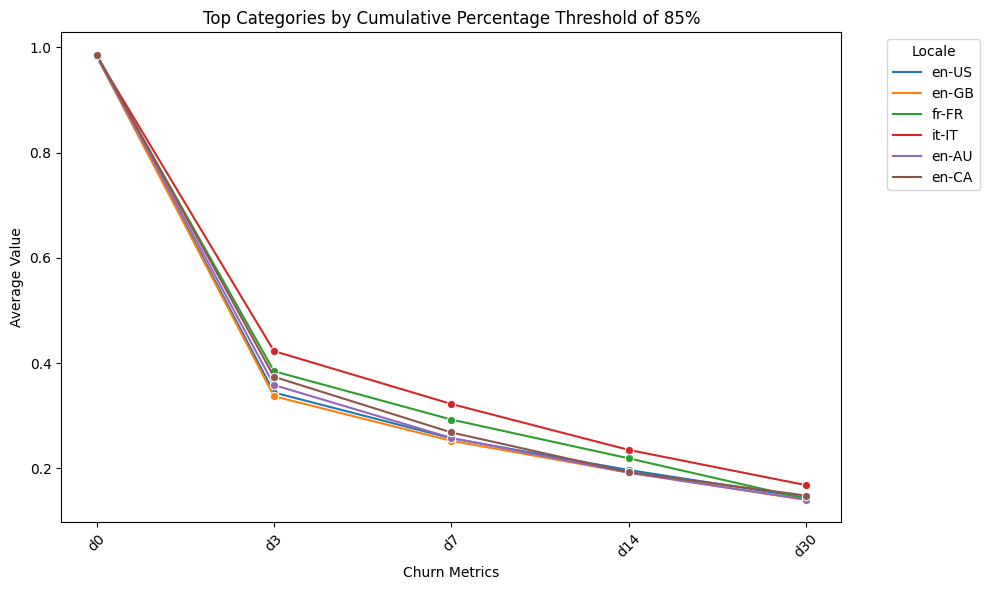

locale        d0               d3               d7              d14  \
                mean  count      mean  count      mean  count      mean   
256  en-US  0.982966  56474  0.344353  56474  0.257428  56474  0.197153   
162  en-GB  0.984053  14736  0.337201  14736  0.252579  14736  0.192318   
351  fr-FR  0.983099   5621  0.384807   5621  0.293008   5621  0.219356   
413  it-IT  0.983649   3853  0.423047   3853  0.322606   3853  0.235401   
120  en-AU  0.984654   3584  0.358538   3584  0.258092   3584  0.191964   
139  en-CA  0.986433   3538  0.374223   3538  0.268513   3538  0.193047   
76   de-DE  0.981684   2566  0.342946   2566  0.263445   2566  0.184723   
286  es-ES  0.984869   2181  0.421825   2181  0.307199   2181  0.215956   
460  nl-NL  0.985258   1221  0.269451   1221  0.206388   1221  0.132678   
535  sv-SE  0.987437   1194  0.448911   1194  0.353434   1194  0.262144   
104     en  0.986473   1035  0.375845   1035  0.294686   1035  0.203865   
308  es-US  0.969188    714  0.236695    714  0.152661    714  0.102241   
222  en-NZ  0.984399    641  0.304212    641  0.244930    641  0.177847   
179  en-IE  0.984914    464  0.293103    464  0.239224    464  0.178879   
313  fa-IR  0.982759    406  0.029557    406  0.012315    406  0.004926   
342  fr-CA  0.992042    377  0.352785    377  0.273210    377  0.185676   
323  fi-FI  0.988920    361  0.180055    361  0.124654    361  0.080332   
453  nl-BE  1.000000    340  0.358824    340  0.252941    340  0.188235   
70   de-AT  0.977941    272  0.393382    272  0.319853    272  0.194853   
338  fr-BE  0.973568    227  0.348018    227  0.224670    227  0.189427   

                 d30        retention_integral deviation deviation_impact  
     count      mean  count                                                
256  56474  0.144899  56474           0.454324  0.003805       214.862969  
162  14736  0.140472  14736           0.445342 -0.005176       -76.279671  
351   5621  0.142501   5621           0.477477  0.026958       151.533329  
413   3853  0.168440   3853           0.524033  0.073514       283.250723  
120   3584  0.140904   3584           0.449777 -0.000742        -2.659696  
139   3538  0.148672   3538           0.462823  0.012304        43.530840  
76    2566  0.134451   2566           0.438335 -0.012184       -31.264801  
286   2181  0.167354   2181           0.508941  0.058422       127.418305  
460   1221  0.097461   1221           0.350833 -0.099686      -121.716896  
535   1194  0.191792   1194           0.572669  0.122150       145.847114  
104   1035  0.142029   1035           0.468277  0.017758        18.379617  
308    714  0.067227    714           0.285854 -0.164665      -117.570486  
222    641  0.123245    641           0.414249 -0.036270       -23.249274  
179    464  0.122845    464           0.411638 -0.038881       -18.040764  
313    406  0.002463    406           0.110181 -0.340338      -138.177335  
342    377  0.135279    377           0.444297 -0.006222        -2.345621  
323    361  0.044321    361           0.239151 -0.211368       -76.303985  
453    340  0.147059    340           0.454314  0.003795         1.290245  
70     272  0.121324    272           0.450123 -0.000396        -0.107804  
338    227  0.088106    227           0.385316 -0.065203       -14.801121

In [91]:
df = calculate_group_averages(merged_df, 'locale')
plot_top_perc_churn_data(df, 'locale', top_perc=0.85)
df.head(20)

c:\Users\h.mercier\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\h.mercier\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


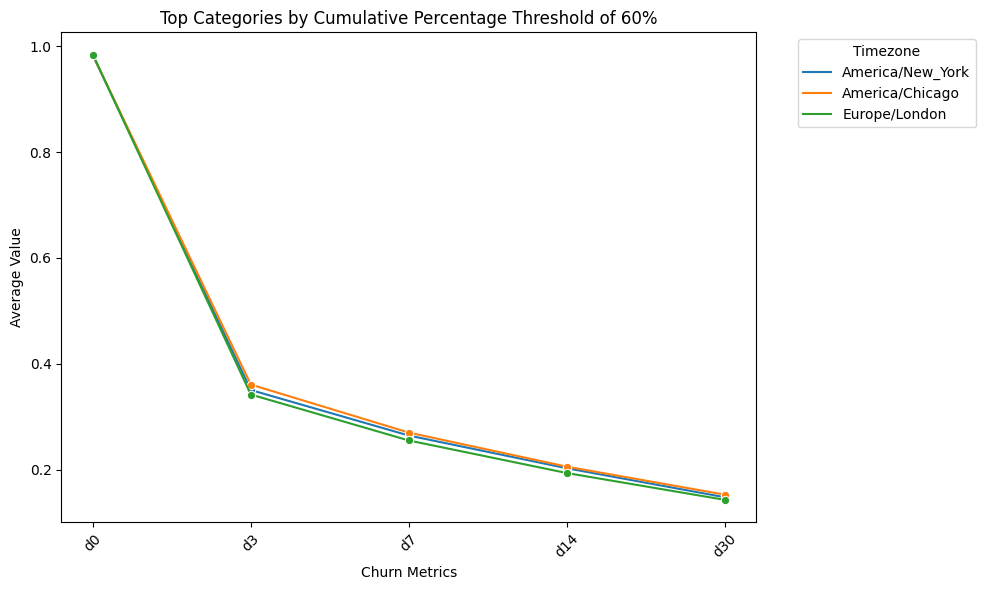

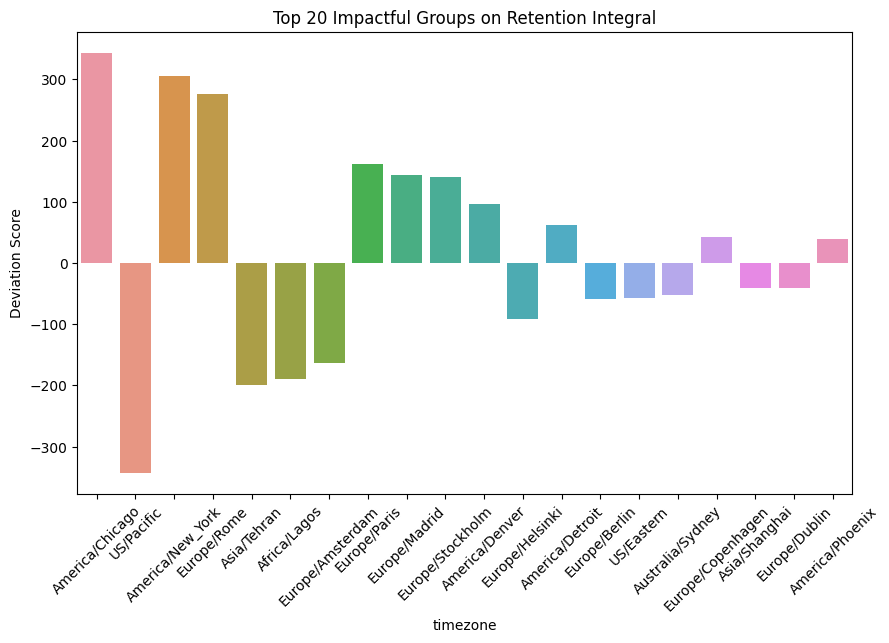

timezone        d0               d3               d7         \
                              mean  count      mean  count      mean  count   
113     America/New_York  0.982771  25248  0.350404  25248  0.264417  25248   
58       America/Chicago  0.983103  16098  0.360728  16098  0.269971  16098   
253        Europe/London  0.984160  14583  0.341905  14583  0.255092  14583   
98   America/Los_Angeles  0.982222   7200  0.349028   7200  0.252500   7200   
261         Europe/Paris  0.982783   5750  0.383826   5750  0.294957   5750   
265          Europe/Rome  0.983229   4293  0.415793   4293  0.318425   4293   
236        Europe/Berlin  0.983907   3107  0.334406   3107  0.259092   3107   
138      America/Toronto  0.984388   2498  0.354684   2498  0.262610   2498   
255        Europe/Madrid  0.985475   2272  0.422535   2272  0.307658   2272   
66        America/Denver  0.980952   2205  0.379138   2205  0.286168   2205   
231     Europe/Amsterdam  0.988235   1530  0.257516   1530  0.198693   1530   
271     Europe/Stockholm  0.988701   1416  0.429379   1416  0.336864   1416   
67       America/Detroit  0.987304   1339  0.365198   1339  0.290515   1339   
305           US/Pacific  0.996940   1307  0.112471   1307  0.075746   1307   
216     Australia/Sydney  0.981087   1269  0.334909   1269  0.236407   1269   
120      America/Phoenix  0.979310   1160  0.375000   1160  0.295690   1160   
206   Australia/Brisbane  0.980460    870  0.379310    870  0.270115    870   
238      Europe/Brussels  0.985348    819  0.350427    819  0.241758    819   
213  Australia/Melbourne  0.989026    729  0.363512    729  0.271605    729   
286     Pacific/Auckland  0.983380    722  0.295014    722  0.234072    722   

          d14              d30        retention_integral deviation  \
         mean  count      mean  count                                
113  0.202630  25248  0.147853  25248           0.462618  0.012099   
58   0.205678  16098  0.152752  16098           0.471847  0.021329   
253  0.193582  14583  0.142906  14583           0.449674 -0.000845   
98   0.196944   7200  0.146111   7200           0.454824  0.004305   
261  0.219304   5750  0.143304   5750           0.478545  0.028026   
265  0.229676   4293  0.164221   4293           0.514776  0.064257   
236  0.178307   3107  0.133248   3107           0.431778 -0.018741   
138  0.184147   2498  0.134107   2498           0.439325 -0.011194   
255  0.218750   2272  0.170775   2272           0.514114  0.063595   
66   0.226304   2205  0.158277   2205           0.494392  0.043873   
231  0.129412   1530  0.095425   1530           0.343965 -0.106554   
271  0.252825   1416  0.180085   1416           0.549647  0.099128   
67   0.218073   1339  0.165049   1339           0.496565  0.046046   
305  0.044376   1307  0.032135   1307           0.188166 -0.262353   
216  0.165485   1269  0.122931   1269           0.409115 -0.041404   
120  0.214655   1160  0.153448   1160           0.484856  0.034337   
206  0.211494    870  0.152874    870           0.477318  0.026799   
238  0.190476    819  0.111111    819           0.414367 -0.036152   
213  0.218107    729  0.149520    729           0.476589  0.026070   
286  0.168975    722  0.117729    722           0.400139 -0.050380   

    deviation_impact  
                      
113       305.465775  
58        343.346936  
253       -12.316948  
98         30.997338  
261       161.149726  
265       275.855746  
236       -58.228853  
138       -27.962850  
255       144.487752  
66         96.739185  
231      -163.027232  
271       140.365254  
67         61.655209  
305      -342.894854  
216       -52.541803  
120        39.831423  
206        23.315234  
238       -29.608303  
213        19.005064  
286       -36.374637

In [115]:
df = calculate_group_averages(merged_df, 'timezone')
plot_top_perc_churn_data(df, 'timezone', top_perc=0.60)
plot_impact_of_groups(df, 'timezone', top_n=20)
df.head(20)

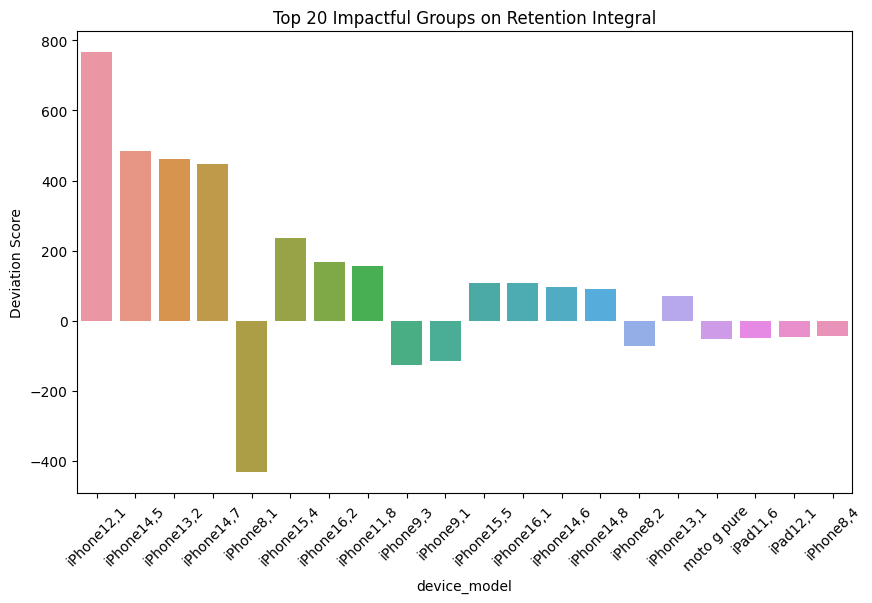

device_model        d0               d3               d7         \
                       mean  count      mean  count      mean  count   
2659   iPhone12,1  0.991718  11229  0.396652  11229  0.311515  11229   
2670   iPhone14,5  0.989607   7794  0.391455   7794  0.292661   7794   
2664   iPhone13,2  0.990261   6469  0.408409   6469  0.301438   6469   
2672   iPhone14,7  0.989669   4840  0.401653   4840  0.307851   4840   
2658   iPhone11,8  0.989995   4398  0.390859   4398  0.283538   4398   
2675   iPhone15,3  0.990580   2654  0.341748   2654  0.241899   2654   
2668   iPhone14,3  0.989257   2141  0.338160   2141  0.236805   2141   
2662   iPhone12,8  0.989242   2138  0.378859   2138  0.269878   2138   
2674   iPhone15,2  0.990923   1983  0.350983   1983  0.268280   1983   
2676   iPhone15,4  0.983031   1709  0.418373   1709  0.321826   1709   

           d14              d30        retention_integral deviation  \
          mean  count      mean  count                                
2659  0.231098  11229  0.170719  11229           0.518716  0.068198   
2670  0.227354   7794  0.171799   7794           0.512497  0.061978   
2664  0.230175   6469  0.175143   6469           0.521719  0.071200   
2672  0.243802   4840  0.188636   4840           0.543017  0.092498   
2658  0.214416   4398  0.154161   4398           0.485789  0.035270   
2675  0.187265   2654  0.139412   2654           0.440354 -0.010165   
2668  0.192433   2141  0.132648   2141           0.434548 -0.015971   
2662  0.197848   2138  0.142189   2138           0.460118  0.009600   
2674  0.203732   1983  0.145739   1983           0.462885  0.012366   
2676  0.265652   1709  0.217671   1709           0.588531  0.138012   

     deviation_impact  
                       
2659       765.790070  
2670       483.055785  
2664       460.593312  
2672       447.688581  
2658       155.117929  
2675       -26.977130  
2668       -34.194273  
2662        20.523950  
2674        24.521044  
2676       235.863220

In [108]:
device_model_df = calculate_group_averages(merged_df, 'device_model')
#plot_top_perc_churn_data(device_model_df, 'device_model', top_perc=0.8)
plot_impact_of_groups(device_model_df, 'device_model', top_n=20)
device_model_df.head(10)

In [85]:
device_model_df[device_model_df['device_model'] == 'iPhone8,1']

device_model        d0              d3              d7             d14  \
                       mean count      mean count      mean count      mean   
2680    iPhone8,1  0.999375  1601  0.103061  1601  0.066209  1601  0.043723   

                 d30       retention_integral deviation deviation_impact  
     count      mean count                                                
2680  1601  0.027483  1601           0.179929  -0.27059      -433.214074

c:\Users\h.mercier\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\h.mercier\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


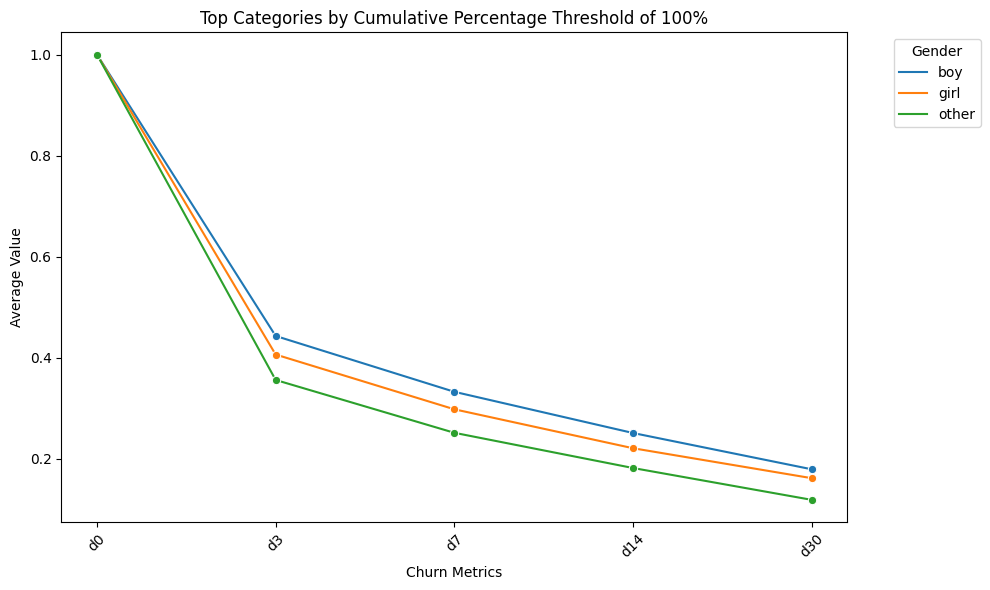

gender   d0               d3               d7              d14         \
         mean  count      mean  count      mean  count      mean  count   
0    boy  1.0  42018  0.443381  42018  0.332929  42018  0.251440  42018   
1   girl  1.0  37042  0.406647  37042  0.298337  37042  0.221316  37042   
2  other  1.0   1493  0.356330   1493  0.251842   1493  0.182184   1493   

        d30        retention_integral deviation deviation_impact  
       mean  count                                                
0  0.179685  42018           0.550587  0.100068      4204.664018  
1  0.162086  37042           0.503953  0.053434      1979.312673  
2  0.119223   1493           0.422661 -0.027858       -41.591367

In [104]:
df = calculate_group_averages(merged_df, 'gender')
plot_top_perc_churn_data(df, 'gender', top_perc=1)
df

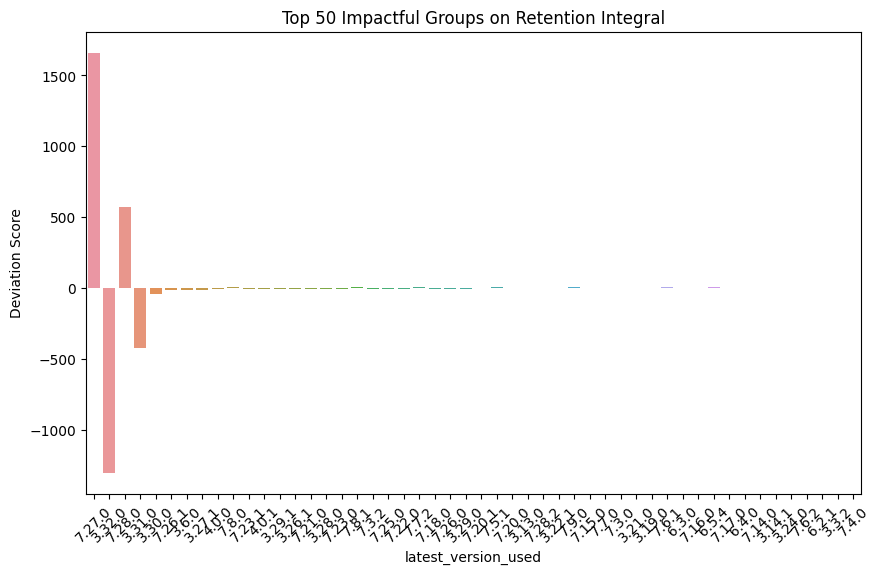

latest_version_used   d0               d3               d7         \
                        mean  count      mean  count      mean  count   
119              7.27.0  1.0  51223  0.365480  51223  0.278215  51223   
44               3.32.0  1.0  24833  0.316152  24833  0.230862  24833   
121              7.28.0  1.0  17333  0.382161  17333  0.279871  17333   
43               3.31.0  1.0   4384  0.282162   4384  0.195027   4384   
54                4.0.1  1.0    635  0.351181    635  0.239370    635   
42               3.30.0  1.0    617  0.283630    617  0.217180    617   
117              7.26.1  1.0    263  0.224335    263  0.186312    263   
141               7.9.1  1.0    150  0.460000    150  0.286667    150   
138               7.8.0  1.0    146  0.438356    146  0.301370    146   
139               7.8.1  1.0    117  0.461538    117  0.230769    117   

          d14              d30        retention_integral deviation  \
         mean  count      mean  count                                
119  0.212053  51223  0.156199  51223           0.482942  0.032423   
44   0.166593  24833  0.113156  24833           0.398027 -0.052492   
121  0.209196  17333  0.155541  17333           0.483371  0.032852   
43   0.143704   4384  0.093294   4384           0.353064 -0.097455   
54   0.188976    635  0.135433    635           0.438898 -0.011621   
42   0.153971    617  0.115073    617           0.385683 -0.064835   
117  0.155894    263  0.129278    263           0.385805 -0.064714   
141  0.193333    150  0.120000    150           0.451333  0.000814   
138  0.226027    146  0.164384    146           0.513699  0.063180   
139  0.188034    117  0.188034    117           0.503704  0.053185   

    deviation_impact  
                      
119      1660.804318  
44      -1303.535553  
121       569.422776  
43       -427.241473  
54         -7.379494  
42        -40.003487  
117       -17.019801  
141         0.122167  
138         9.224242  
139         6.222623

In [107]:
df = calculate_group_averages(merged_df, 'latest_version_used')
#plot_top_perc_churn_data(df, 'latest_version_used', top_perc=0.95)
plot_impact_of_groups(df, 'latest_version_used', top_n=50)
df.head(10)

c:\Users\h.mercier\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\h.mercier\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


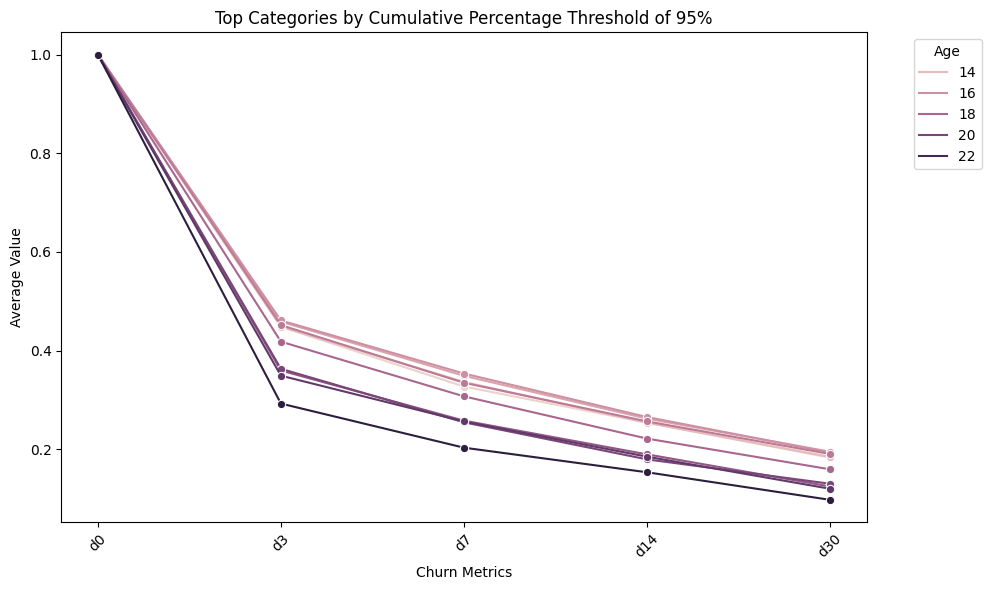

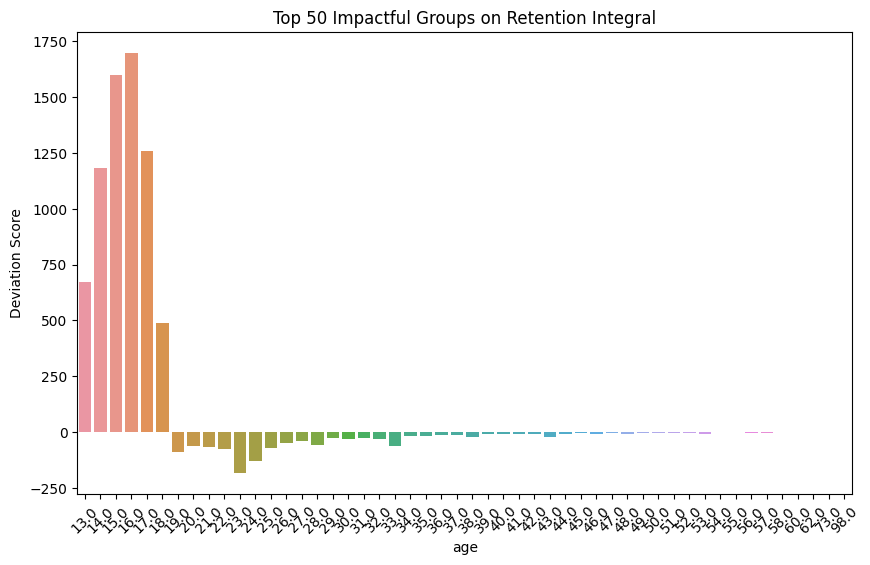

age   d0               d3               d7              d14         \
         mean  count      mean  count      mean  count      mean  count   
3   16.0  1.0  13230  0.460998  13230  0.353364  13230  0.265231  13230   
2   15.0  1.0  12619  0.458515  12619  0.348760  12619  0.261907  12619   
1   14.0  1.0  10994  0.448426  10994  0.336456  10994  0.253502  10994   
4   17.0  1.0  10954  0.451525  10954  0.334672  10954  0.256345  10954   
5   18.0  1.0   9038  0.418013   9038  0.307148   9038  0.221509   9038   
0   13.0  1.0   6464  0.448175   6464  0.327042   6464  0.253868   6464   
6   19.0  1.0   5344  0.359469   5344  0.257859   5344  0.189558   5344   
7   20.0  1.0   3540  0.362994   3540  0.254520   3540  0.179379   3540   
8   21.0  1.0   2521  0.349068   2521  0.256248   2521  0.184847   2521   
10  23.0  1.0   2147  0.292501   2147  0.203074   2147  0.153237   2147   
9   22.0  1.0   1998  0.340841   1998  0.237237   1998  0.179179   1998   
11  24.0  1.0   1144  0.299825   1144  0.189685   1144  0.128497   1144   
12  25.0  1.0    263  0.098859    263  0.060837    263  0.053232    263   
15  28.0  1.0    184  0.043478    184  0.027174    184  0.027174    184   
20  33.0  1.0    182  0.038462    182  0.021978    182  0.021978    182   
13  26.0  1.0    162  0.098765    162  0.061728    162  0.037037    162   
14  27.0  1.0    143  0.090909    143  0.041958    143  0.041958    143   
16  29.0  1.0    100  0.060000    100  0.050000    100  0.040000    100   
19  32.0  1.0     95  0.063158     95  0.010526     95  0.031579     95   
17  30.0  1.0     83  0.012048     83  0.012048     83  0.000000     83   

         d30        retention_integral deviation deviation_impact  
        mean  count                                                
3   0.193424  13230           0.578798  0.128279      1697.135108  
2   0.195023  12619           0.577220  0.126701      1598.835482  
1   0.184555  10994           0.558053  0.107534      1182.228675  
4   0.190341  10954           0.565352  0.114833      1257.882764  
5   0.159217   9038           0.504758  0.054239       490.210288  
0   0.182859   6464           0.554321  0.103802       670.979239  
6   0.124439   5344           0.433633 -0.016886       -90.239606  
7   0.129944   3540           0.433399 -0.017120       -60.603531  
8   0.119794   2521           0.424712 -0.025806       -65.058117  
10  0.097345   2147           0.365456 -0.085063      -182.630720  
9   0.117117   1998           0.413480 -0.037039       -74.003405  
11  0.086538   1144           0.339307 -0.111212      -127.226942  
12  0.026616    263           0.182383 -0.268136       -70.519801  
15  0.021739    184           0.148370 -0.302149       -55.595475  
20  0.000000    182           0.121978 -0.328541       -59.794438  
13  0.006173    162           0.153498 -0.297021       -48.117393  
14  0.020979    143           0.165268 -0.285251       -40.790868  
16  0.030000    100           0.171000 -0.279519       -27.951889  
19  0.000000     95           0.127719 -0.322800       -30.665961  
17  0.000000     83           0.104418 -0.346101       -28.726401

In [93]:
df = calculate_group_averages(merged_df, 'age')
plot_top_perc_churn_data(df, 'age', top_perc=0.95)
plot_impact_of_groups(df, 'age', top_n=50)
df.head(20)

## Corelation heat map

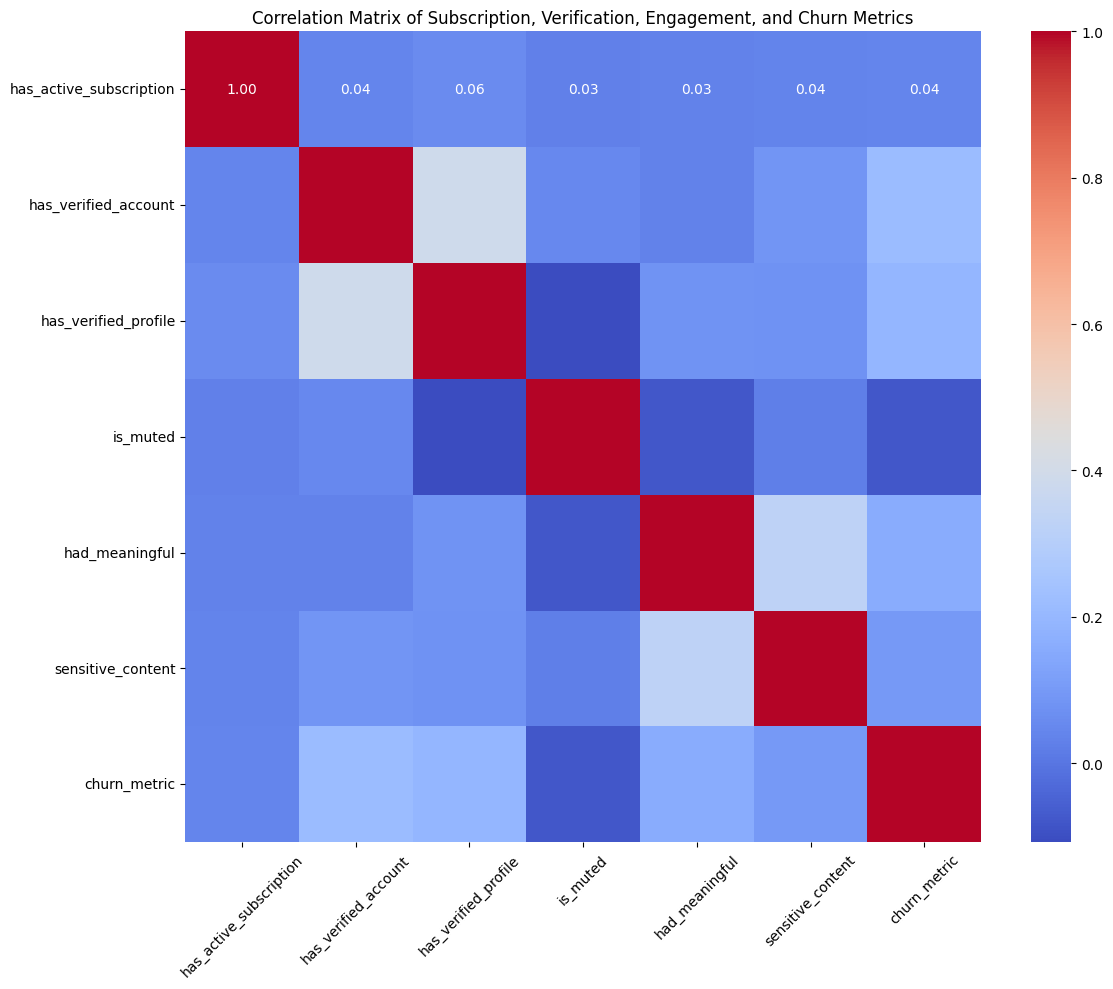

,has_active_subscription,has_verified_account,has_verified_profile,is_muted,had_meaningful,sensitive_content,churn_metric
has_active_subscription,1.000000,0.040098,0.056817,0.028073,0.031928,0.035189,0.040592
has_verified_account,0.040098,1.000000,0.386096,0.051253,0.034536,0.085904,0.212894
has_verified_profile,0.056817,0.386096,1.000000,-0.108268,0.082032,0.076635,0.193308
is_muted,0.028073,0.051253,-0.108268,1.000000,-0.079460,0.022137,-0.081566
had_meaningful,0.031928,0.034536,0.082032,-0.079460,1.000000,0.328112,0.156795
sensitive_content,0.035189,0.085904,0.076635,0.022137,0.328112,1.000000,0.095870
churn_metric,0.040592,0.212894,0.193308,-0.081566,0.156795,0.095870,1.000000


In [103]:
# Convert boolean columns to numeric where True=1, False=0, None stays as NaN
corelation_df = merged_df[['has_active_subscription', 'has_verified_account', 'has_verified_profile', 'is_muted', 'had_meaningful', 'sensitive_content']].copy()
corelation_df["churn_metric"] = ((merged_df['d0'] * 3 + merged_df['d3'] * 4 + merged_df['d7'] * 7 + merged_df['d14'] * 16 + merged_df['d30'] * 30) / 30)
corelation_df["churn_metric"] = corelation_df["churn_metric"].apply(pd.to_numeric, errors='coerce')

boolean_columns = ['has_active_subscription', 'has_verified_account', 'has_verified_profile', 'is_muted']
for col in boolean_columns:
    corelation_df[col] = corelation_df[col].map({True: 1, False: 0})

# Calculate the correlation matrix
correlation_matrix = corelation_df.corr()

# Plot the heat map
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Correlation Matrix of Subscription, Verification, Engagement, and Churn Metrics')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()  # Adjust layout to ensure no clipping of tick labels
plt.show()

correlation_matrix

# Major correlation between retention and engagement metrics are has_verified_account and has_verified_profile followed v=by had_meaningful and sensitive_content
# We can not that has_verified_account and has_verified_profile are highly correlated with each other
# Same for had_meaningful and sensitive_content

### Focus on has_verified_account

In [106]:
# Average has verified account and profile per os on merged df
merged_df.groupby('os')[['has_verified_account', 'has_verified_profile', 'had_meaningful', 'sensitive_content']].mean()

# At this stage we can make the hypothesis that the retention metric difference on os is due to the difference at the onboarding process

,has_verified_account,has_verified_profile,had_meaningful,sensitive_content
os,,,,
Android,0.798976,0.460823,0.488992,0.405773
iOS,0.89831,0.540711,0.485679,0.434590


In [113]:
# order by count
df = merged_df.groupby('device_model')[['has_verified_account', 'has_verified_profile', 'had_meaningful', 'sensitive_content']].agg(['mean', 'count']).sort_values(by=('has_verified_account', 'count'), ascending=False)
df.head(15)

# For the case of the iPhone8,1 it is even clearer that the retention problem is due to the onboarding process, more precisely the profile verification process
# Indeed, in that iPhone, there is no facial recognition which can add more friction to the onboarding process

has_verified_account        has_verified_profile         \
                             mean  count                 mean  count   
device_model                                                           
iPhone12,1               0.911482  10303              0.56469  10303   
iPhone14,5               0.910926   7084             0.574252   7084   
iPhone13,2               0.918791   5923             0.563228   5923   
iPhone14,7               0.926966   4450             0.591685   4450   
iPhone11,8               0.912626   3960             0.531818   3960   
iPhone15,3               0.858705   2378             0.576114   2378   
iPhone12,8               0.868189   1927             0.520498   1927   
iPhone14,3               0.849947   1886             0.561506   1886   
iPhone15,2               0.883436   1793             0.569994   1793   
iPhone15,4               0.927665   1576             0.604444   1575   
iPhone13,4               0.863194   1440             0.534028   1440   
iPhone8,1                0.906535   1423             0.131505   1422   
iPhone14,8               0.906501   1369             0.593134   1369   
iPhone14,2               0.868045   1258             0.533386   1258   
iPhone16,2               0.906058   1139             0.628622   1139   

             had_meaningful       sensitive_content        
                       mean count              mean count  
device_model                                               
iPhone12,1         0.507853  8341          0.449424  9372  
iPhone14,5         0.499475  5712          0.429062  6407  
iPhone13,2         0.493249  4888          0.446946  5419  
iPhone14,7         0.490142  3652          0.413150  4076  
iPhone11,8         0.496638  3272          0.471012  3605  
iPhone15,3         0.454148  1832          0.400000  2045  
iPhone12,8         0.539597  1490          0.480433  1661  
iPhone14,3         0.438804  1438          0.415946  1618  
iPhone15,2         0.435277  1406          0.390488  1598  
iPhone15,4         0.492378  1312          0.449051  1423  
iPhone13,4         0.461609  1094          0.426613  1240  
iPhone8,1          0.331584  1143          0.409717  1235  
iPhone14,8         0.487849  1111          0.420756  1243  
iPhone14,2         0.439877   973          0.426895  1108  
iPhone16,2         0.417960   902          0.386802   985

In [114]:
# order by count
df = merged_df.groupby('latest_version_used')[['has_verified_account', 'has_verified_profile', 'had_meaningful', 'sensitive_content']].agg(['mean', 'count']).sort_values(by=('has_verified_account', 'count'), ascending=False)
df.head(5)


has_verified_account        has_verified_profile         \
                                    mean  count                 mean  count   
latest_version_used                                                           
7.27.0                          0.897927  46702             0.542396  46702   
3.32.0                          0.800271  22130             0.465929  22130   
7.28.0                          0.894191  15906             0.539704  15905   
3.31.0                          0.790263   3800             0.447368   3800   
4.0.1                           0.826241    564             0.469858    564   

                    had_meaningful        sensitive_content         
                              mean  count              mean  count  
latest_version_used                                                 
7.27.0                    0.491419  36824          0.440920  40978  
3.32.0                    0.508367  16254          0.420792  17593  
7.28.0                    0.464280  12458          0.411004  13995  
3.31.0                    0.492526   2743          0.434090   2951  
4.0.1                     0.453901    423          0.372294    462

### On meaningful conversation

In [ ]:
# Hypothesis: to have meaningful convsercation, you need to have access to a pool of user that are close to you
# Close in term of age, or location (estimation by timezone), or language (estimation by locale)

# Could explain the decrease of retenttion if there is new country launched recently